## 新型冠状病毒肺炎潜伏期新认识

<div style="background-color:black;color:white;font-size:25px;font-weight:bold;">
    <p style='line-height:39px;margin:14px;'>1.从https://github.com/wuhan2020/wuhan2020/tree/master/data/json/patient_detail 获取病人就诊详情，存入文件</p>
    <p style='line-height:39px;margin:14px;'>2.整理数据，得到可分析样本</span><br/>
    <p style='line-height:39px;margin:14px;'>3.从地区，性别，年龄，初诊分型，确诊时间等方向探索病症潜伏期的变化</span>
</div>

In [1]:
import requests
import re
from bs4 import BeautifulSoup as bs

import json
import csv
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
loc_dict = {"11shandong":"山东","12shanxi":"山西","13zhongqing":"重庆","14fujian":"福建","15tianjin":"天津","16yunnan":"云南",\
            "17sichuan":"四川","18guangxi":"广西","1anhui":"安徽","21liaoning":"辽宁","23neimenggu":"内蒙古","24guizhou":"贵州",\
            "25gansu":"甘肃","2henan":"河南","32xianggang":"香港","33aomen":"澳门","4jiangsu":"江苏","5guangdong":"广东",\
            "7shanghai":"上海","8hebei":"河北","9shanxi":"陕西","3zhejiang":"浙江"}

In [3]:
### 把json写入csv
def load_and_save_patients(json,filename,total_patient_list):
    loc_key = filename[:filename.find(".")]
    #print(loc_key)
    writer = open(loc_key+".csv",'w',encoding='utf-8',newline="")
    csv_writer = csv.writer(writer,delimiter=',')
    
    flag = True
    key_list = []
    value_list = []
    type_list = []
    patient_count = 0
    
    for i,each_patient_data in enumerate(json):
        #print(f"单个病人:{each_patient_data}")
        for patient_info in each_patient_data:
            #print(patient_info)
            if patient_info == 'null':
                continue
            keys = list(patient_info.keys())
            #print(f"当前key值：{patient_info[keys[0]]}")
            if i == 0:
                cur_key = patient_info[keys[0]]
                key_list.append(cur_key)
            cur_value = patient_info[keys[1]]
            value_list.append(cur_value)
            cur_type = patient_info[keys[2]]
            type_list.append(cur_type)
        value_list.append(loc_dict[loc_key])
        if i == 0 :
            if total_patient_list == []:
                key_list.append('地区')     #只执行一次即可
                total_patient_list.append(key_list)
        csv_writer.writerow(key_list)
        total_patient_list.append(value_list)
        csv_writer.writerow(value_list)
        #print(f"各病人值列表:{value_list}=====end=====")
        value_list = []
        patient_count += 1
    writer.close()
    print(f"地区：{loc_dict[loc_key]}，区域病例数：{patient_count}，总行数：{len(total_patient_list)}")
    return total_patient_list

### 加载并保存数据

In [4]:
#由于文件增大导致无法预览，病例详情数据源不再使用爬虫从原项目地址爬取，改用文件动态加载更新的json文件的方式读取数据
data_key_list = []
data_value_list = []
data_type_list = []
all_patient_list = []

base_path = "F:/wuhan-data/wuhan2020/data/json/patient_detail"
data_file_list = os.listdir(base_path)
for filename in data_file_list:
    data_file = base_path + "/" + filename
    patient_text_reader = open(data_file,'r',encoding='utf-8')
    loc_json_text = patient_text_reader.read()
    loc_patient_json = json.loads(loc_json_text.replace('null','\"null\"'))
    
    #加载并保存数据
    all_patient_list = load_and_save_patients(loc_patient_json,filename,all_patient_list)
    
    
'''
    for i,loc_patient in enumerate(loc_patient_json):
        #print(chongqing_patient)
        for patient_data in loc_patient:
            keys = list(patient_data.keys())        
            if i == 0:
                cur_key = patient_data[keys[0]]
                #print(f"ready to add key:{cur_key}")
                data_key_list.append(cur_key)
            cur_value = patient_data[keys[1]]
            data_value_list.append(cur_value)
            cur_type = patient_data[keys[2]]
            data_type_list.append(cur_type)
        if i == 0:
            #print(f"ready to add keys:{data_key_list}")
            cq_patient_info.append(data_key_list)
        cq_patient_info.append(data_value_list)
        print(data_value_list)
        print("=====one patient load done=====")
        data_value_list = []
    patient_text_reader.close()
'''
df_total = pd.DataFrame(data=all_patient_list[1:],columns=all_patient_list[0])
df_total.to_excel('all_patient_data.xlsx')

地区：山东，区域病例数：642，总行数：643
地区：山西，区域病例数：27，总行数：670
地区：重庆，区域病例数：621，总行数：1291
地区：福建，区域病例数：78，总行数：1369
地区：天津，区域病例数：630，总行数：1999
地区：云南，区域病例数：212，总行数：2211
地区：四川，区域病例数：122，总行数：2333
地区：广西，区域病例数：42，总行数：2375
地区：安徽，区域病例数：256，总行数：2631
地区：辽宁，区域病例数：105，总行数：2736
地区：内蒙古，区域病例数：20，总行数：2756
地区：贵州，区域病例数：66，总行数：2822
地区：甘肃，区域病例数：3，总行数：2825
地区：河南，区域病例数：233，总行数：3058
地区：香港，区域病例数：123，总行数：3181
地区：澳门，区域病例数：25，总行数：3206
地区：浙江，区域病例数：1200，总行数：4406
地区：江苏，区域病例数：403，总行数：4809
地区：广东，区域病例数：721，总行数：5530
地区：上海，区域病例数：13，总行数：5543
地区：河北，区域病例数：206，总行数：5749
地区：陕西，区域病例数：50，总行数：5799


E:\Anaconda3\anaconda\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://www.hk01.com/%E7%A4%BE%E6%9C%83%E6%96%B0%E8%81%9E/431794/%E6%AD%A6%E6%BC%A2%E8%82%BA%E7%82%8E-42%E6%AD%B2%E7%94%B7%E6%82%A3%E8%80%85%E4%BD%8F%E6%B2%99%E7%94%B0%E5%BE%A1%E9%BE%8D%E5%B1%B1-%E5%90%8C%E4%BD%8F%E5%8F%8B%E4%BA%BA%E7%84%A1%E7%97%85%E5%BE%B5%E5%AE%B6%E5%82%AD%E6%9C%89%E7%97%85%E5%BE%B5' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
E:\Anaconda3\anaconda\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://news.mingpao.com/ins/%E6%B8%AF%E8%81%9E/article/20200210/s00001/1581325845922/%E3%80%90%E6%AD%A6%E6%BC%A2%E8%82%BA%E7%82%8E%E3%80%91%E5%BC%B5%E7%AB%B9%E5%90%9B-%E6%96%B0%E5%A2%9E%E5%85%A9%E5%AE%97%E7%A2%BA%E8%A8%BA%E6%84%9F%E6%9F%93-%E7%B4%AF%E8%A8%8838%E5%AE%97' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
E:\Anaconda3\an

### 数据清洗 

#### 数据集基本信息

In [5]:
df_total.shape

(5798, 31)

In [6]:
df_total.head()

,是否湖北居民,患者编号,患者名,省,市,区/县,镇/街道,年龄,性别,密切患者,...,起始（上车）地,目的（下车）地,地点,事件,开始时间,结束时间,数据源1,数据源2,审核状态,地区
0,否,532000001,xxx,山东省,青岛市,,,37,男,,...,,,,武汉,,,http://wsjsw.qingdao.gov.cn/n28356065/n3256306...,,已审核,山东
1,否,532000002,xxx,山东省,青岛市,李沧区,,41,男,,...,,,,武汉,2020-01-12T16:00:00.000Z,2020-01-15T16:00:00.000Z,http://wsjsw.qingdao.gov.cn/n28356065/n3256306...,,已审核,山东
2,是,532000003,xxx,山东省,青岛市,市北区,,66,男,,...,,,,,,,http://wsjsw.qingdao.gov.cn/n28356065/n3256306...,,已审核,山东
3,否,532000004,xxx,山东省,青岛市,黄岛区,,24,男,,...,,,,武汉出差,2020-01-09T16:00:00.000Z,2020-01-10T16:00:00.000Z,http://wsjsw.qingdao.gov.cn/n28356065/n3256306...,,已审核,山东
4,是,532000005,xxx,山东省,青岛市,城阳区,,56,女,,...,,,,由湖北荆门途经武汉到青岛,2020-01-20T16:00:00.000Z,2020-01-20T16:00:00.000Z,http://wsjsw.qingdao.gov.cn/n28356065/n3256306...,,已审核,山东


In [7]:
df_total.columns.values
#list(df_total)

array(['是否湖北居民', '患者编号', '患者名', '省', '市', '区/县', '镇/街道', '年龄', '性别',
       '密切患者', '离鄂时间', '离鄂城市', '发病日期', '发病地点', '确诊日期', '确诊医院', '病症',
       '密触人数', '时间', '出行方式', '车次/车厢/座位', '起始（上车）地', '目的（下车）地', '地点', '事件',
       '开始时间', '结束时间', '数据源1', '数据源2', '审核状态', '地区'], dtype=object)

#### 1.去除无效信息，2.去重，3.填补非空

In [8]:
df_valid = df_total[(df_total.审核状态=='已审核')]
df_valid.shape

(3308, 31)

In [9]:
df_valid.drop_duplicates()
df_valid.shape

(3308, 31)

In [10]:
df_valid.replace("null","",inplace=True)
df_valid.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)

E:\Anaconda3\anaconda\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [11]:
df_valid = df_valid[~(df_valid.发病日期.isnull())]
df_valid = df_valid[~(df_valid.离鄂时间.isnull())]
df_valid.shape

(913, 31)

In [12]:
df_in_use = df_valid.drop(columns=['是否湖北居民','患者名','省','市','区/县','镇/街道','密切患者','离鄂城市','发病地点','确诊医院','病症',\
                                   '密触人数','时间','出行方式','车次/车厢/座位','起始（上车）地','目的（下车）地','地点','事件','开始时间',\
                                   '结束时间','数据源1','数据源2','审核状态'])
df_in_use.describe()

,年龄
count,913.000000
mean,43.567360
std,15.876376
min,0.000000
25%,32.000000
50%,44.000000
75%,55.000000
max,88.000000


In [13]:
df_in_use.年龄.value_counts().sort_values(ascending=False)

56    36
52    29
53    28
29    27
46    25
      ..
85     1
9      1
11     1
8      1
88     1
Name: 年龄, Length: 80, dtype: int64

In [14]:
df_in_use.dtypes

患者编号    object
年龄       int64
性别      object
离鄂时间    object
发病日期    object
确诊日期    object
地区      object
dtype: object

In [15]:
df_in_use.isnull().sum()
#df_in_use.isnull().sum()/df_in_use.shape[0]*100

患者编号    0
年龄      0
性别      3
离鄂时间    0
发病日期    0
确诊日期    4
地区      0
dtype: int64

In [16]:
df_in_use[df_in_use.年龄==0].shape

(13, 7)

In [17]:
round(df_valid.年龄.mean())

44

In [18]:
#确诊日期和性别为空数量较少,直接丢弃；年龄为0的可填补均值
df_in_use.年龄[df_in_use.年龄==0] = round(df_valid.年龄.mean())
df_in_use.dropna(axis=0,how='any',inplace=True)
df_in_use.isnull().sum()

E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


患者编号    0
年龄      0
性别      0
离鄂时间    0
发病日期    0
确诊日期    0
地区      0
dtype: int64

In [19]:
df_in_use.shape

(906, 7)

In [20]:
#字符串转时间类型，并扩展出新的列：潜伏期
df_in_use.离鄂时间 = pd.to_datetime(df_in_use.离鄂时间,format='%Y-%m-%d')
df_in_use.发病日期 = pd.to_datetime(df_in_use.发病日期,format='%Y-%m-%d')
df_in_use.确诊日期 = pd.to_datetime(df_in_use.确诊日期,format='%Y-%m-%d')
df_in_use.dtypes

患者编号                 object
年龄                    int64
性别                   object
离鄂时间    datetime64[ns, UTC]
发病日期    datetime64[ns, UTC]
确诊日期    datetime64[ns, UTC]
地区                   object
dtype: object

In [21]:
df_in_use.head(25)

,患者编号,年龄,性别,离鄂时间,发病日期,确诊日期,地区
74,539000008,48,男,2020-01-21 16:00:00+00:00,2020-01-24 16:00:00+00:00,2020-01-24 16:00:00+00:00,山东
75,539000009,41,男,2020-01-18 16:00:00+00:00,2020-01-22 16:00:00+00:00,2020-01-22 16:00:00+00:00,山东
77,539000011,34,男,2020-01-21 16:00:00+00:00,2020-01-19 16:00:00+00:00,2020-01-25 16:00:00+00:00,山东
78,539000012,47,女,2020-01-22 16:00:00+00:00,2020-01-25 16:00:00+00:00,2020-01-26 16:00:00+00:00,山东
79,539000013,33,男,2020-01-20 16:00:00+00:00,2020-01-26 16:00:00+00:00,2020-01-26 16:00:00+00:00,山东
80,539000014,32,女,2020-01-20 16:00:00+00:00,2020-01-26 16:00:00+00:00,2020-01-26 16:00:00+00:00,山东
81,539000015,56,男,2020-01-20 16:00:00+00:00,2020-01-23 16:00:00+00:00,2020-01-25 16:00:00+00:00,山东
82,539000016,51,男,2020-01-20 16:00:00+00:00,2020-01-27 16:00:00+00:00,2020-01-28 16:00:00+00:00,山东
83,539000017,39,男,2020-01-19 16:00:00+00:00,2020-01-27 16:00:00+00:00,2020-01-29 16:00:00+00:00,山东
85,539000019,34,男,2020-01-21 16:00:00+00:00,2020-01-25 16:00:00+00:00,2020-01-30 16:00:00+00:00,山东


In [22]:
df_in_use['incubation'] = df_in_use.apply(lambda x:x.发病日期-x.离鄂时间,axis=1).dt.days     #间隔日期，时间差转int
df_in_use_corr = df_in_use[df_in_use.incubation > 0]
df_in_use_corr.shape     #最终有效数据：733行
df_in_use_corr.describe()

,年龄,incubation
count,720.000000,720.000000
mean,43.737500,5.348611
std,15.102035,3.502731
min,2.000000,1.000000
25%,33.000000,2.000000
50%,44.000000,5.000000
75%,55.000000,8.000000
max,88.000000,21.000000


### 探索性分析

In [23]:
df_in_use_corr.确诊日期.min()

Timestamp('2020-01-08 16:00:00+0000', tz='UTC')

In [24]:
def seperate_age(age):
    if age >= 0 and age < 12:     #儿童
        age_code = 0
    elif age >= 12 and age < 18:     #少年
        age_code = 1
    elif age >= 18 and age < 25:     #青春
        age_code = 2
    elif age >= 25 and age < 35:     #后青春
        age_code = 3
    elif age >= 35 and age < 60:     #第二人生
        age_code = 4
    elif age >= 60 and age < 80:     #暮年
        age_code = 5
    else:     #长寿老年
        age_code = 6
    
    return age_code
def trans_gender_to_code(gender):
    if gender == "男":
        gender_code = 0
    else:
        gender_code = 1
    return gender_code

def confirm_during(confirm_date):
    base_confirm_date = df_in_use_corr.确诊日期.min()
    #base_confirm_date = np.datetime64(base_date)
    confirm_after = ((confirm_date - base_confirm_date)/np.timedelta64(1,'D')).astype(int)
    return confirm_after

In [25]:
df_in_use_corr['confirm_after'] = df_in_use_corr.确诊日期.apply(confirm_during)
df_in_use_corr['age_level'] = df_in_use_corr.年龄.apply(seperate_age)
df_in_use_corr['gender_code'] = df_in_use_corr.性别.apply(trans_gender_to_code)
df_in_use_corr

E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,患者编号,年龄,性别,离鄂时间,发病日期,确诊日期,地区,incubation,confirm_after,age_level,gender_code
74,539000008,48,男,2020-01-21 16:00:00+00:00,2020-01-24 16:00:00+00:00,2020-01-24 16:00:00+00:00,山东,3,16,4,0
75,539000009,41,男,2020-01-18 16:00:00+00:00,2020-01-22 16:00:00+00:00,2020-01-22 16:00:00+00:00,山东,4,14,4,0
78,539000012,47,女,2020-01-22 16:00:00+00:00,2020-01-25 16:00:00+00:00,2020-01-26 16:00:00+00:00,山东,3,18,4,1
79,539000013,33,男,2020-01-20 16:00:00+00:00,2020-01-26 16:00:00+00:00,2020-01-26 16:00:00+00:00,山东,6,18,3,0
80,539000014,32,女,2020-01-20 16:00:00+00:00,2020-01-26 16:00:00+00:00,2020-01-26 16:00:00+00:00,山东,6,18,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5749,029000002,22,男,2020-01-16 16:00:00+00:00,2020-01-19 16:00:00+00:00,2020-01-22 16:00:00+00:00,陕西,3,14,2,0
5754,029000007,32,女,2020-01-13 16:00:00+00:00,2020-01-16 16:00:00+00:00,2020-01-25 16:00:00+00:00,陕西,3,17,3,1
5760,029000013,48,男,2020-01-08 16:00:00+00:00,2020-01-16 16:00:00+00:00,2020-01-26 16:00:00+00:00,陕西,8,18,4,0
5761,029000014,36,男,2020-01-19 16:00:00+00:00,2020-01-24 16:00:00+00:00,2020-01-27 16:00:00+00:00,陕西,5,19,4,0


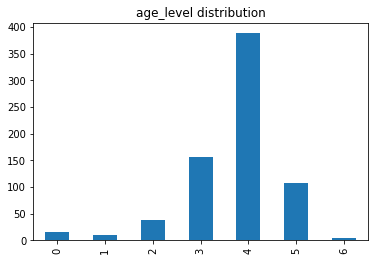

In [26]:
df_in_use_corr.age_level.value_counts().sort_index().plot(kind='bar',title='age_level distribution')

In [27]:
df_in_use_corr.incubation.value_counts().sort_index()

1     87
2     96
3     80
4     79
5     70
6     72
7     55
8     45
9     41
10    30
11    28
12    17
13     5
14     7
15     2
16     1
18     1
19     1
20     1
21     2
Name: incubation, dtype: int64

In [29]:
df_in_use_corr.incubation.describe()

count    720.000000
mean       5.348611
std        3.502731
min        1.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       21.000000
Name: incubation, dtype: float64

In [32]:
incubation_long = df_in_use_corr[df_in_use_corr.incubation > 14].incubation.value_counts().sum()
print(f'有效样本中超长潜伏期8例，占有效样本的{round(incubation_long/df_in_use_corr.shape[0],4)*100}%')

有效样本中超长潜伏期8例，占有效样本的1.11%


x-size:26,y-size:26


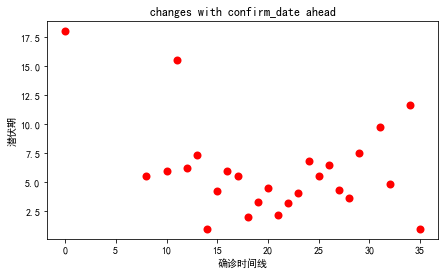

In [33]:
#df_in_use_corr.groupby('confirm_after').incubation.mean().plot(kind='bar',title='incubation increasing with confirm_date aheads')     直方图
plt.figure(figsize=(7,4))
x = df_in_use_corr.confirm_after.unique()
y = df_in_use_corr.groupby('confirm_after').incubation.mean()
#x = df_in_use_corr.confirm_after
#y = df_in_use_corr.incubation
print(f"x-size:{len(x)},y-size:{len(y)}")
plt.scatter(x,y,color='red',linewidths=2)
plt.xlabel('确诊时间线')
plt.ylabel('潜伏期')
plt.rcParams['font.sans-serif']=['SimHei']     #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False     #用来正常显示负号
plt.title('changes with confirm_date ahead')
plt.show()

E:\Anaconda3\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


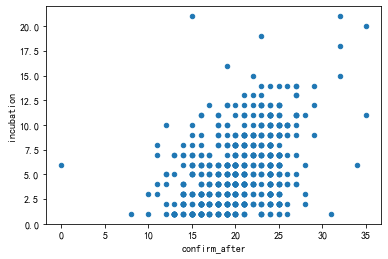

In [34]:
df_in_use_corr.plot(kind='scatter',x='confirm_after',y='incubation')
plt.show()

                  年龄  incubation  confirm_after  gender_code
age_level                                                   
0           6.866667    6.933333      22.200000     0.533333
1          14.800000    5.800000      21.400000     0.300000
2          21.894737    4.473684      20.631579     0.368421
3          30.095541    4.859873      20.910828     0.458599
4          46.889175    5.621134      20.543814     0.453608
5          66.203704    5.018519      18.787037     0.435185
6          85.000000    8.250000      21.250000     0.500000


<BarContainer object of 7 artists>

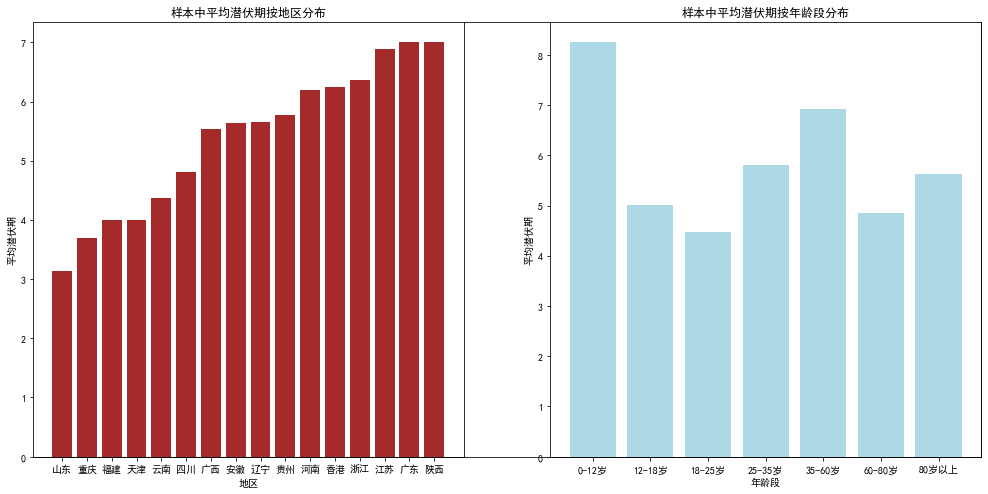

In [72]:
df_incubation_loc = df_in_use_corr.groupby('地区').mean().sort_values(by='incubation',ascending=True)
df_incubation_age_level = df_in_use_corr.groupby('age_level').mean().sort_index(ascending=True)
print(df_incubation_age_level)
fig = plt.figure(figsize=(17,8))
plt.xticks([])
plt.yticks([])
ax1 = fig.add_subplot(121)
plt.xlabel('地区')
plt.ylabel("平均潜伏期")
plt.title('样本中平均潜伏期按地区分布')
x1 = df_in_use_corr.地区.unique()
y1 = df_incubation_loc.incubation
ax1.bar(x1,y1,color='brown')
ax2 = fig.add_subplot(122)
plt.xlabel('年龄段')
plt.ylabel("平均潜伏期")
plt.title('样本中平均潜伏期按年龄段分布')
x2 = df_in_use_corr.age_level.unique()
y2 = df_incubation_age_level.incubation
plt.xticks(list(range(0,7)),['0-12岁','12-18岁','18-25岁','25-35岁','35-60岁','60-80岁','80岁以上'])
ax2.bar(x2,y2,color='lightblue')

In [55]:
print(type(df_in_use_corr.地区.unique()))
print(df_in_use.地区.unique())
# df_incubation_loc.shape

<class 'numpy.ndarray'>
['山东' '重庆' '福建' '天津' '云南' '四川' '广西' '安徽' '辽宁' '贵州' '河南' '香港' '澳门' '浙江'
 '江苏' '广东' '陕西']


### 原获取数据途径：爬虫爬取预览的结构化病例信息

In [4]:
headers = {
    'Host': 'github.com',
    'Referer':'https://github.com/wuhan2020/wuhan2020/tree/master/data/json/patient_detail',
    'method':'GET',
    'Accept':'text/html',
    'Accept-Encoding':'gzip,deflate,br',
    'Accept-Language':'zh-CN,zh;q=0.9',
    'Connection':'keep-alive',
    'Cookie':'_octo=GH1.1.713062315.1572516124; logged_in=no; _ga=GA1.2.853684210.1572516126; tz=Asia%2FShanghai; _gat=1; _gh_sess=TQMnaMqWwYcFCmROgJxf69P%2FG97ZFuio40iMMYCe493l2kus07saOyjt0PyacSeqtRu8M50T88QdcfBExYd3aLlk74kysm7Z64iv4og1UJAX%2BYpF05RZuQcjHIRFO6Id8h1x7cBh%2FSmPUa0LkreX5TSZ06%2BOpNUe%2BcF5hBlRddTQvnLlyXvW%2FD6NzzsoC3tnE6KH47i0ilF0Os4YEKIZOMhJVn3oiWNBf0GBHgJAavWomm61zs5V1KeoUb0GsYPdgdtznaZ%2FI1J827G4bNfFfSbEBX0D51L1XiVHasRtpUbL%2Fn1f79YmTd6zd3F9ChpdSp0OhUwItHx5t6uHYDvmgGKzXDks4M%2FB6v2X9G%2F%2F%2BKKpvgKNsG6A6rAvl8%2F5xfmg--mXBW2FSLSEVwiu2g--eKQUmkZyaU%2F6uV2xsIk6SA%3D%3D',

    'Sec-Fetch-Mode':'cors',
    'Sec-Fetch-Site':'same-origin',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}
resp = requests.get('https://github.com/wuhan2020/wuhan2020/tree/master/data/json/patient_detail')
resp.encoding

'utf-8'

In [ ]:
page_text = resp.text
page_model = bs(page_text,'lxml')
rs = page_model.find_all('a',class_='js-navigation-open')

In [9]:
total_patient_list = []     #所有地区病人列表

for ele in rs:
    if ele['href'] != "" and ('tree' not in ele['href']):
        url_cur = 'http://github.com' + ele['href']
        location = url_cur[url_cur.rfind("/")+1:url_cur.rfind(".")]
        r_patients_in_province = requests.get(url_cur)
        patients_in_province_text = r_patients_in_province.text
        patients_model = bs(patients_in_province_text,'lxml')
        if patients_model.find(id='LC1') == None:
            continue
        patients_text_ori = patients_model.find(id='LC1').text
        patients_text = patients_text_ori.replace('null','\"null\"')
        all_patient_data = json.loads(patients_text)
        #存入文件,并返回所有地区病人暂存列表
        loc_patient_tempList = load_and_save_patients(all_patient_data,location,total_patient_list)
    else:
        continue

地区：山西，病例数：27，总行数：28
地区：福建，病例数：46，总行数：74
地区：天津，病例数：629，总行数：703
地区：云南，病例数：212，总行数：915
地区：四川，病例数：122，总行数：1037
地区：广西，病例数：42，总行数：1079
地区：安徽，病例数：500，总行数：1579
地区：辽宁，病例数：105，总行数：1684
地区：内蒙古，病例数：20，总行数：1704
地区：贵州，病例数：66，总行数：1770
地区：甘肃，病例数：3，总行数：1773
地区：河南，病例数：152，总行数：1925
地区：香港，病例数：119，总行数：2044
地区：澳门，病例数：25，总行数：2069
地区：江苏，病例数：403，总行数：2472
地区：上海，病例数：13，总行数：2485
地区：河北，病例数：206，总行数：2691
地区：陕西，病例数：50，总行数：2741


In [10]:
df_total_patient_ori = pd.DataFrame(total_patient_list)
df_total_patient_ori.shape

(2741, 31)

In [12]:
df_total_patient_ori.head(30)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,是否湖北居民,患者编号,患者名,省,市,区/县,镇/街道,年龄,性别,密切患者,...,起始（上车）地,目的（下车）地,地点,事件,开始时间,结束时间,数据源1,数据源2,审核状态,"""地区"""
1,否,0351,,山西,太原,万柏林区,,0,男,,...,,,,,,,,,,山西
2,,,,山西,太原,万柏林区,,0,,,...,,,,,,,,,,山西
3,,,,山西,太原,万柏林区,,0,,,...,,,,,,,,,,山西
4,,,,山西,太原,万柏林区,,0,,,...,,,,,,,,,,山西
5,,,,山西,太原,万柏林区,,0,,,...,,,,,,,,,,山西
6,,,,山西,太原,万柏林区,,0,,,...,,,,,,,,,,山西
7,,,,山西,太原,万柏林区,,0,,,...,,,,,,,,,,山西
8,否,,,山西,太原,尖草坪区,南寨兴安社区,68,男,,...,武汉,太原南,,,,,,,,山西
9,,,,山西,太原,迎泽区,,0,,,...,,,,,,,,,,山西


In [41]:
#单地区测试
response = requests.get('https://github.com/wuhan2020/wuhan2020/tree/master/data/json/patient_detail/16yunnan.json')
print(response.encoding)
aomen_page = response.text
aomen_model = bs(aomen_page,'lxml')
aoment_patients_text_ori = aomen_model.find(id='LC1').text

utf-8


In [42]:
aoment_patients_text = aoment_patients_text_ori.replace('null','\"null\"')
all_patient_data = json.loads(aoment_patients_text)
df_yunnan = pd.DataFrame(all_patient_data)
df_yunnan.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"{'key': '是否湖北居民', 'value': '是', 'type': 'enum'}","{'key': '患者编号', 'value': '0888000001', 'type':...","{'key': '患者名', 'value': '', 'type': 'string'}","{'key': '省', 'value': '湖北', 'type': 'string'}","{'key': '市', 'value': '武汉', 'type': 'string'}","{'key': '区/县', 'value': '', 'type': 'string'}","{'key': '镇/街道', 'value': '', 'type': 'string'}","{'key': '年龄', 'value': 34, 'type': 'int'}","{'key': '性别', 'value': '女', 'type': 'enum'}","{'key': '密切患者', 'value': '', 'type': 'string'}",...,"{'key': '车次/车厢/座位', 'value': '', 'type': 'stri...","{'key': '起始（上车）地', 'value': '武汉', 'type': 'str...","{'key': '目的（下车）地', 'value': '', 'type': 'string'}","{'key': '地点', 'value': '', 'type': 'string'}","{'key': '事件', 'value': '', 'type': 'string'}","{'key': '开始时间', 'value': '', 'type': 'date'}","{'key': '结束时间', 'value': '', 'type': 'date'}","{'key': '数据源1', 'value': 'http://ynswsjkw.yn.g...","{'key': '数据源2', 'value': '', 'type': 'url'}","{'key': '审核状态', 'value': '已审核', 'type': 'enum'}"
1,"{'key': '是否湖北居民', 'value': '否', 'type': 'enum'}","{'key': '患者编号', 'value': '0691000001', 'type':...","{'key': '患者名', 'value': '', 'type': 'string'}","{'key': '省', 'value': '云南', 'type': 'string'}","{'key': '市', 'value': '西双版纳', 'type': 'string'}","{'key': '区/县', 'value': '景洪', 'type': 'string'}","{'key': '镇/街道', 'value': '', 'type': 'string'}","{'key': '年龄', 'value': 39, 'type': 'int'}","{'key': '性别', 'value': '女', 'type': 'enum'}","{'key': '密切患者', 'value': '', 'type': 'string'}",...,"{'key': '车次/车厢/座位', 'value': '', 'type': 'stri...","{'key': '起始（上车）地', 'value': '武汉', 'type': 'str...","{'key': '目的（下车）地', 'value': '西双版纳', 'type': 's...","{'key': '地点', 'value': '', 'type': 'string'}","{'key': '事件', 'value': '武汉29日游', 'type': 'stri...","{'key': '开始时间', 'value': '2019-12-11T16:00:00....","{'key': '结束时间', 'value': '2020-01-04T16:00:00....","{'key': '数据源1', 'value': 'http://ynswsjkw.yn.g...","{'key': '数据源2', 'value': '', 'type': 'url'}","{'key': '审核状态', 'value': '已审核', 'type': 'enum'}"
2,"{'key': '是否湖北居民', 'value': '是', 'type': 'enum'}","{'key': '患者编号', 'value': '0871000001', 'type':...","{'key': '患者名', 'value': '', 'type': 'string'}","{'key': '省', 'value': '湖北', 'type': 'string'}","{'key': '市', 'value': '武汉', 'type': 'string'}","{'key': '区/县', 'value': '', 'type': 'string'}","{'key': '镇/街道', 'value': '', 'type': 'string'}","{'key': '年龄', 'value': 51, 'type': 'int'}","{'key': '性别', 'value': '男', 'type': 'enum'}","{'key': '密切患者', 'value': '', 'type': 'string'}",...,"{'key': '车次/车厢/座位', 'value': '', 'type': 'stri...","{'key': '起始（上车）地', 'value': '武汉', 'type': 'str...","{'key': '目的（下车）地', 'value': '昆明', 'type': 'str...","{'key': '地点', 'value': '', 'type': 'string'}","{'key': '事件', 'value': '', 'type': 'string'}","{'key': '开始时间', 'value': '2020-01-14T16:00:00....","{'key': '结束时间', 'value': '2020-01-15T16:00:00....","{'key': '数据源1', 'value': ' https://m.weibo.cn/...","{'key': '数据源2', 'value': '', 'type': 'url'}","{'key': '审核状态', 'value': '已审核', 'type': 'enum'}"
3,"{'key': '是否湖北居民', 'value': '是', 'type': 'enum'}","{'key': '患者编号', 'value': '0871000002', 'type':...","{'key': '患者名', 'value': '', 'type': 'string'}","{'key': '省', 'value': '湖北', 'type': 'string'}","{'key': '市', 'value': '武汉', 'type': 'string'}","{'key': '区/县', 'value': '', 'type': 'string'}","{'key': '镇/街道', 'value': '', 'type': 'string'}","{'key': '年龄', 'value': 53, 'type': 'int'}","{'key': '性别', 'value': '男', 'type': 'enum'}","{'key': '密切患者', 'value': '', 'type': 'string'}",...,"{'key': '车次/车厢/座位', 'value': '', 'type': 'stri...","{'key': '起始（上车）地', 'value': '武汉', 'type': 'str...","{'key': '目的（下车）地', 'value': '昆明', 'type': 'str...","{'key': '地点', 'value': '', 'type': 'string'}","{'key': '事件', 'value': '16号来昆', 'type': 'string'}","{'key': '开始时间', 'value': '', 'type': 'date'}","{'key': '结束时间', 'value': '', 'type': 'date'}","{'key': '数据源1', 'value': 'https://m.weibo.cn/2...","{'key': '数据源2', 'value': '', 'type': 'url'}","{'key': '审核状态', 'value': '已审核', 'type': 